In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df_calendar = pd.read_csv('/Users/wiz/Downloads/archive/calendar.csv')
df_listings = pd.read_csv('/Users/wiz/Downloads/archive/listings.csv')
df_reviews = pd.read_csv('/Users/wiz/Downloads/archive/reviews.csv')

In [100]:
df_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [101]:
#checking the num 
df_listings[['price','review_scores_rating','number_of_reviews']].isnull().sum()

price                     0
review_scores_rating    647
number_of_reviews         0
dtype: int64

In [102]:
# dropping nan in 'review_scores_rating'
df_listings1=df_listings.dropna(subset = ['review_scores_rating']) 

In [103]:
df_listings1['price'] = df_listings1['price'].str.replace("[$, ]", "").astype("float")

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [104]:
df_listings1[['price','review_scores_rating']].describe()

,price,review_scores_rating
count,3171.000000,3171.000000
mean,126.802586,94.539262
std,90.007172,6.606083
min,22.000000,20.000000
25%,75.000000,93.000000
50%,100.000000,96.000000
75%,150.000000,99.000000
max,1000.000000,100.000000


In [105]:
df_listings1['price'].describe()

count    3171.000000
mean      126.802586
std        90.007172
min        22.000000
25%        75.000000
50%       100.000000
75%       150.000000
max      1000.000000
Name: price, dtype: float64

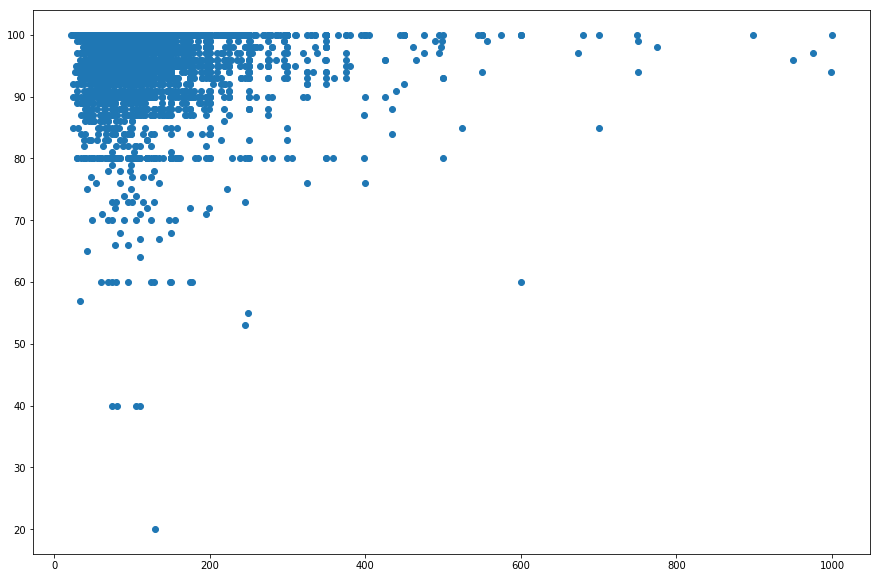

In [106]:
# plot the chart
x=df_listings1['price']
y=df_listings1['review_scores_rating']
plt.subplots(figsize = (15,10))
plt.scatter(x, y)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1b215b38>]],
      dtype=object)

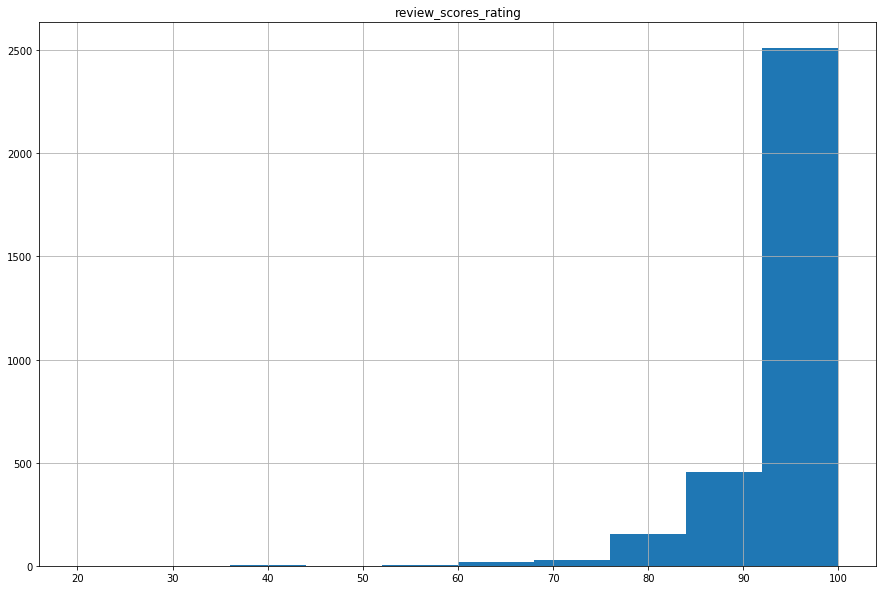

In [108]:
df_listings1.hist('review_scores_rating', bins=10, figsize=(15,10))

In [109]:
# create 4 equal bins
df_listings1['ratingBins'] =  pd.qcut(df_listings1['review_scores_rating'], 4)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [110]:
# number of records in the bins
df_listings1['ratingBins'].value_counts()

(19.999, 93.0]    950
(99.0, 100.0]     781
(93.0, 96.0]      736
(96.0, 99.0]      704
Name: ratingBins, dtype: int64

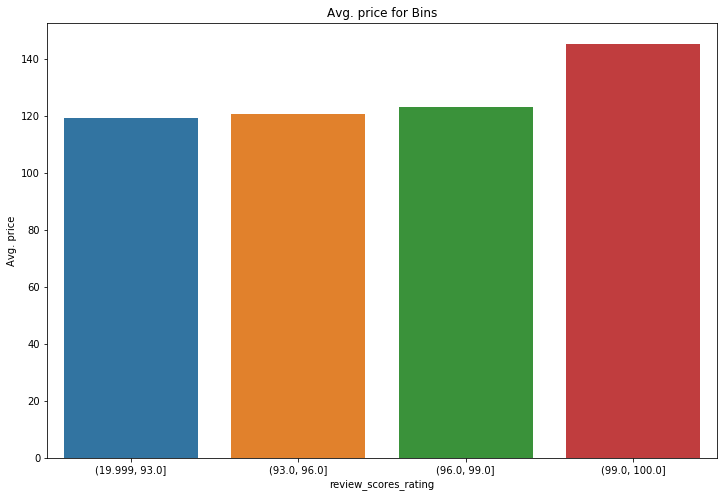

In [120]:
# plot the review_scores_rating bin
plt.figure(figsize=(12,8))
sns.barplot(data=df_listings1.groupby(["ratingBins"]).mean(), x = df_listings1.groupby(["ratingBins"]).mean().index , y = df_listings1.groupby(["ratingBins"])['price'].mean())
plt.ylabel('Avg. price')
plt.xlabel('review_scores_rating')
plt.title('Avg. price for Bins');

In [78]:
# create the price bin
df_listings1['PriceBins'] =  pd.qcut(df_listings1['price'], 4)

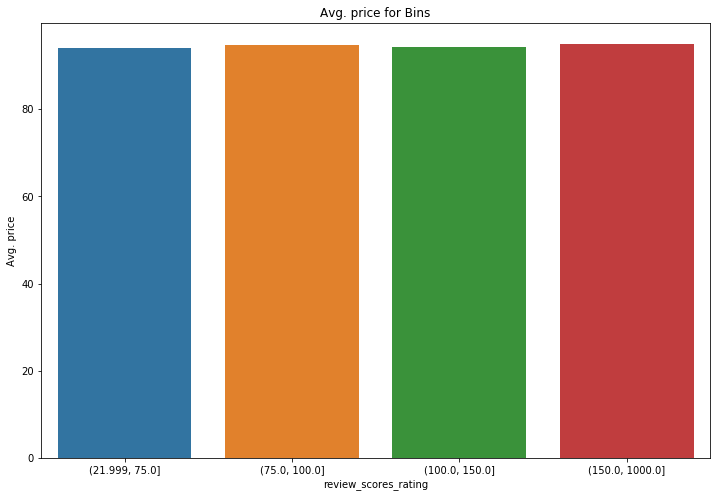

In [79]:
# plot the price bin chart 
plt.figure(figsize=(12,8))
sns.barplot(data=df_listings1.groupby(["PriceBins"]).mean(), x = df_listings1.groupby(["PriceBins"]).mean().index , y = df_listings1.groupby(["PriceBins"])['review_scores_rating'].mean())
plt.ylabel('Avg. price')
plt.xlabel('review_scores_rating')
plt.title('Avg. price for Bins');

In [81]:
df_listings1.groupby(["PriceBins"])["review_scores_rating"].mean()

PriceBins
(21.999, 75.0]     94.133795
(75.0, 100.0]      94.706737
(100.0, 150.0]     94.390215
(150.0, 1000.0]    95.032440
Name: review_scores_rating, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1b79d0b8>]],
      dtype=object)

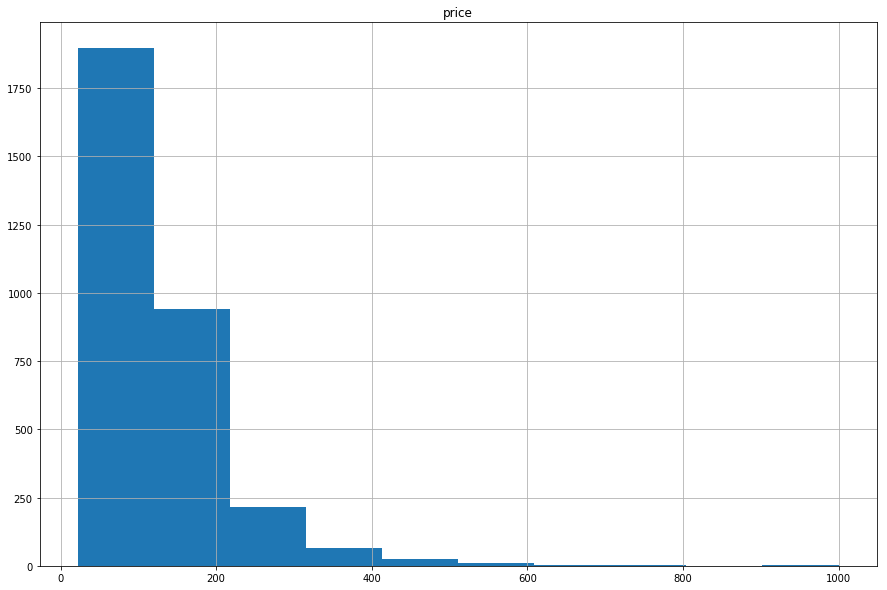

In [111]:
df_listings1.hist('price', bins=10, figsize=(15,10))

In [125]:
# drop the NaN for number_of_reviews
df_listings2=df_listings.dropna(subset = ['number_of_reviews']) 

In [126]:
df_listings2['Bins'] =  pd.qcut(df_listings2['number_of_reviews'], 5)

In [130]:
df_listings2['price'] = df_listings2['price'].str.replace("[$, ]", "").astype("float")

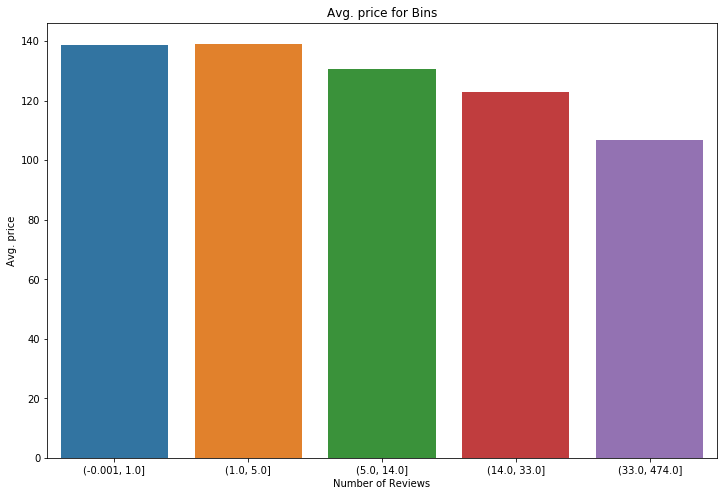

In [131]:
#plot the chart for the bin of number_of_reviews
plt.figure(figsize=(12,8))
sns.barplot(data=df_listings2.groupby(['Bins']).mean(), x = df_listings2.groupby(['Bins']).mean().index , y = df_listings2.groupby(['Bins'])['price'].mean())
plt.ylabel('Avg. price')
plt.xlabel('Number of Reviews')
plt.title('Avg. price for Bins');

In [132]:
df_listings2['Bins'].value_counts()

(-0.001, 1.0]    937
(33.0, 474.0]    752
(5.0, 14.0]      743
(14.0, 33.0]     724
(1.0, 5.0]       662
Name: Bins, dtype: int64

In [133]:
#then create a price bin 
df_listings2['PriceBins'] =  pd.qcut(df_listings2['price'], 5)

In [135]:
df_listings2['PriceBins'].value_counts()

(92.0, 120.0]      823
(19.999, 69.0]     816
(169.0, 1000.0]    756
(69.0, 92.0]       712
(120.0, 169.0]     711
Name: PriceBins, dtype: int64

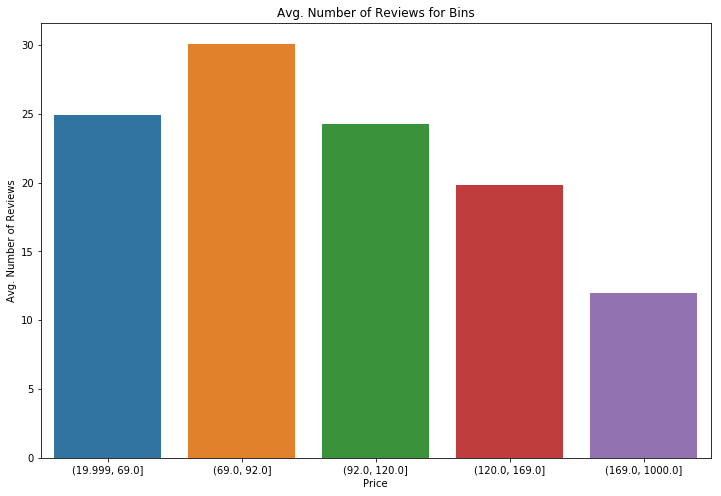

In [134]:
#plot the chart 
plt.figure(figsize=(12,8))
sns.barplot(data=df_listings2.groupby(["PriceBins"]).mean(), x = df_listings2.groupby(["PriceBins"]).mean().index , y = df_listings2.groupby(["PriceBins"])['number_of_reviews'].mean())
plt.ylabel('Avg. Number of Reviews')
plt.xlabel('Price')
plt.title('Avg. Number of Reviews for Bins');

In [136]:
df_listings2.groupby(["PriceBins"])["number_of_reviews"].mean()

PriceBins
(19.999, 69.0]     24.935049
(69.0, 92.0]       30.091292
(92.0, 120.0]      24.235723
(120.0, 169.0]     19.822785
(169.0, 1000.0]    11.953704
Name: number_of_reviews, dtype: float64